<a href="https://colab.research.google.com/github/ashwin6cs/Goeduhub-Tasks/blob/main/Assignment-7/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GO_STP_5856 - Ashwin S**

# Assignment-7

Prediction using Supervised Machine Learning using Simple Linear Regression

In this task we have to find the students scores based on their study hours. This is a simple Regression problem type because it has only two variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

# Reading the data

In [2]:
df = pd.read_csv("/content/StudentHoursScores.csv")  # Reading the dataset...

# Analysing the data

In [3]:
df.head()       

,Hours,Scores
0,7.7,79
1,5.9,60
2,4.5,45
3,3.3,33
4,1.1,12


In [4]:
df.tail()     

,Hours,Scores
18,9.6,96
19,4.3,42
20,4.1,40
21,3.0,30
22,2.6,25


In [5]:
df.isnull().sum()  

Hours     0
Scores    0
dtype: int64

# Visualizing the data

Text(0, 0.5, 'Percentage Score')

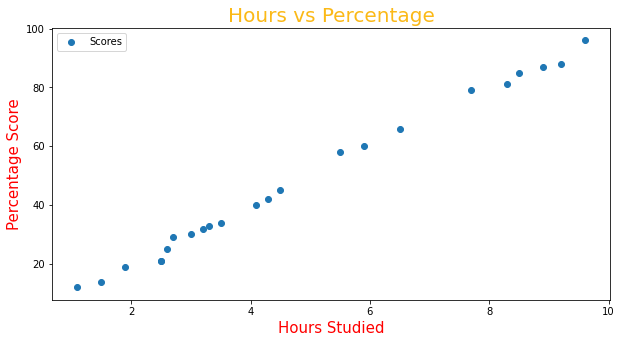

In [6]:
df.plot(x='Hours', y='Scores', style='o', figsize=(10, 5))      
plt.title('Hours vs Percentage',color="#FBB917", size=20)     
plt.xlabel('Hours Studied', color="red",size=15)                    
plt.ylabel('Percentage Score', color="red",size=15)                                        

# Data preprocessing

In [7]:
X = df.iloc[:, :-1].values    
y = df.iloc[:, 1].values 

# Model Training

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training complete.")

Training complete.


# Plotting the line of Regression:

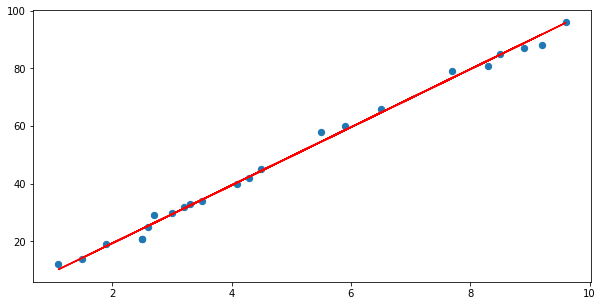

In [9]:
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.figure(figsize=(10, 5))
plt.scatter(X, y, s=40)
plt.plot(X, line, color="red")
plt.show()

# Making Predictions

In [10]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) 

[[9.2]
 [5.5]
 [3. ]
 [8.5]
 [4.1]]


# Comparing Actual vs Predicted values


In [11]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
0,88,91.818828
1,58,54.569310
2,30,29.400718
3,85,84.771622
4,40,40.474898


In [12]:
print("Training Score: ",regressor.score(X_train, y_train))
print("Test Score: ",regressor.score(X_test, y_test))

Training Score:  0.9959881759446586
Test Score:  0.9900509060111311


# Predicting Values

In [13]:
n = float(input("Enter the Number of Hours: "))
own_pred = regressor.predict(np.array([n]).reshape(-1,1)) # Asking the input and converting it into an numpy array and reshaping it and predicting the value using regressor    
print("No of Hours = {}\nPredicted Score = {}".format(n,own_pred[0]))  # Printing the values of hours and Predicted Score.
print("Hence if a student studies for {0} Hours then his score will be {1:.2f}%".format(n,own_pred[0]))

Enter the Number of Hours: 8.0
No of Hours = 8.0
Predicted Score = 79.73790331736336
Hence if a student studies for 8.0 Hours then his score will be 79.74%


# Evaluation

In [14]:
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test, y_pred)) 
print("Root Mean Squared Error: ",np.sqrt(mean_absolute_error(y_test, y_pred)))
print("R - 2: ",r2_score(y_test, y_pred))

Mean Squared Error:  5.397980434600632
Mean Absolute Error:  1.7104152948388986
Root Mean Squared Error:  1.3078284653726187
R - 2:  0.9900509060111312
